In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

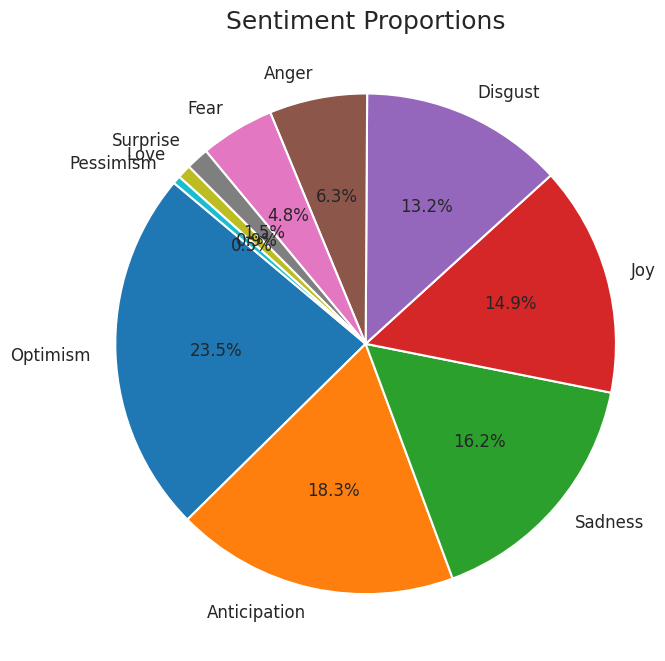

/tmp/ipykernel_2005526/3941752183.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


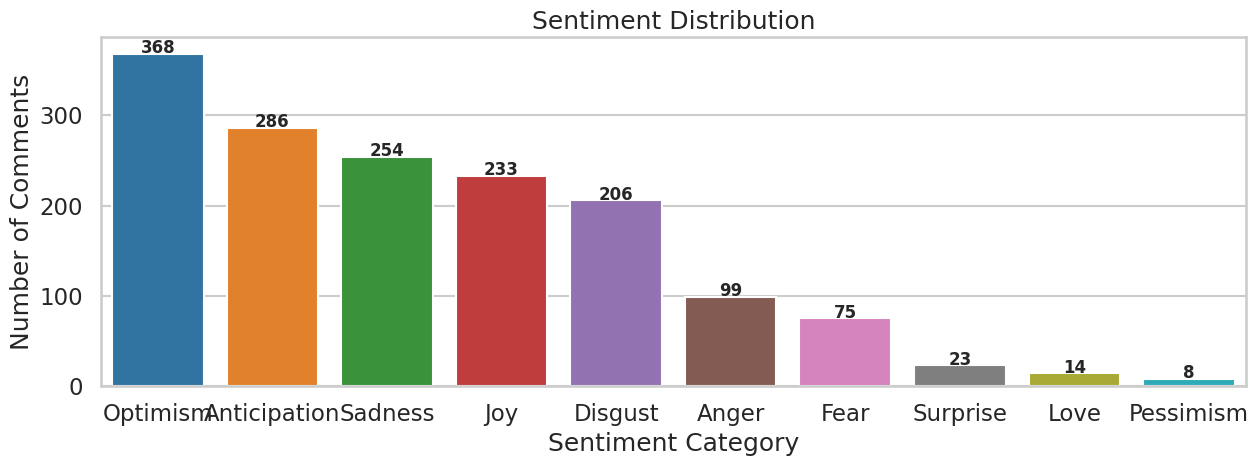

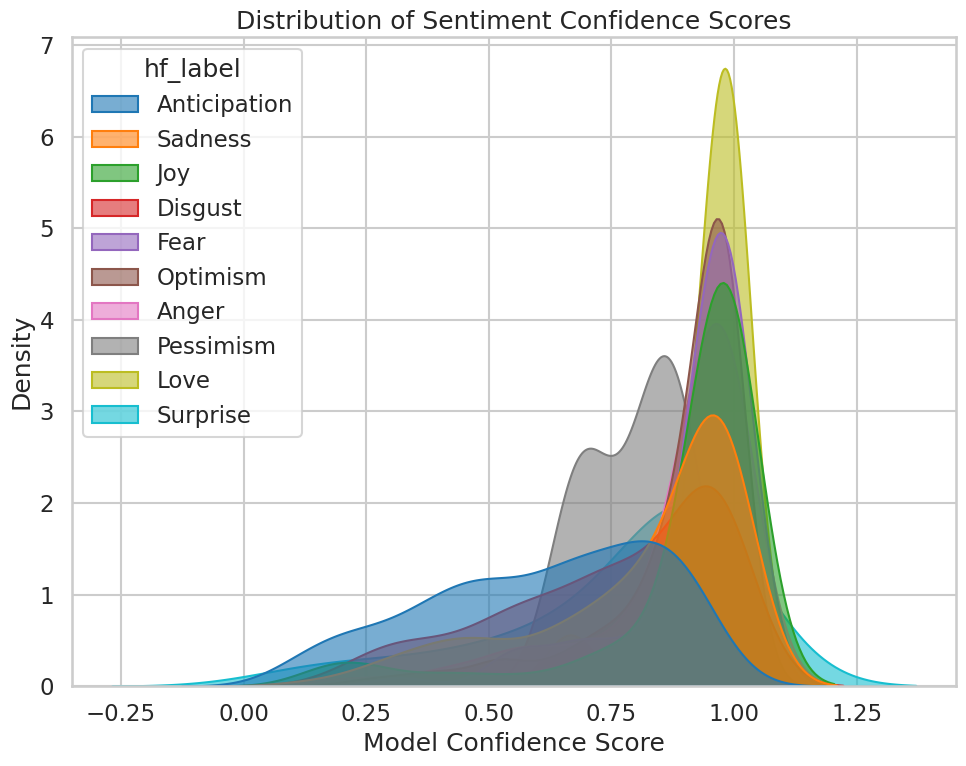

In [36]:
df = pd.read_csv("ENDEVR_sent.csv")

df['hf_label'] = df['hf_label'].str.capitalize()
sentiment_counts = df['hf_label'].value_counts()

sns.set(style="whitegrid", context="talk")

sentiment_counts = df['hf_label'].value_counts()
labels = sentiment_counts.index.tolist()
values = sentiment_counts.values.tolist()

palette = sns.color_palette("tab10", n_colors=len(labels))
colors = palette 

# --- Plot pie chart ---
plt.figure(figsize=(7, 7))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title("Sentiment Proportions", fontsize=18)
plt.axis('equal')  
plt.tight_layout()
# plt.savefig("endvr_sent_pie.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# --- Bar Plot of Sentiment Distribution ---
plt.figure(figsize=(13, 5))
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette=palette,
    legend=False
)
# Annotate bars
for i, val in enumerate(sentiment_counts.values):
    plt.text(i, val + 0.5, f'{val}', ha='center', fontsize=12, fontweight='bold')

# total = len(df)
# for i, val in enumerate(sentiment_counts.values):
#     plt.text(i, val + 0.5, f'{val} ({val/total*100:.1f}%)', ha='center')

plt.title("Sentiment Distribution", fontsize=18)
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()

# --- Sentiment Score Density Plot ---
plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=df,
    x="hf_score",
    hue="hf_label",
    # legend=False,
    fill=True,
    common_norm=False,
    palette=palette,
    alpha=0.6
)
plt.title("Distribution of Sentiment Confidence Scores", fontsize=18)
plt.xlabel("Model Confidence Score")
plt.ylabel("Density")
plt.tight_layout()
# plt.savefig("endvr_sent_confscore.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()
